# Multiple Linear Regression

Importing the dataset

In [1]:
df= read.csv("Cleaned file.csv",header = TRUE)

In [2]:
colnames(df)

[1] "budget"                                            
 [2] "approximate_count"                                 
 [3] "character_count_body"                              
 [4] "prev_1_cost_per_click"                             
 [5] "prev_2_cost_per_click"                             
 [6] "prev_3_cost_per_click"                             
 [7] "prev_1_clicks"                                     
 [8] "prev_2_clicks"                                     
 [9] "prev_3_clicks"                                     
[10] "prev_1_spend"                                      
[11] "prev_2_spend"                                      
[12] "prev_3_spend"                                      
[13] "interest...Auto.Racing"                            
[14] "interest...Indianapolis.Motor.Speedway"            
[15] "interest...Nascar.Racing"                          
[16] "interest...Nascar.Racing.1"                        
[17] "aws_label_classroom"                               
[18] "aws_label_computer"                                
[19] "aws_label_electronics"                             
[20] "aws_label_lcd_screen"                              
[21] "aws_label_laptop"                                  
[22] "aws_label_pc"                                      
[23] "goal_detail_AWARENESS"                             
[24] "goal_detail_ENGAGEMENT"                            
[25] "goal_detail_PAGEVIEW"                              
[26] "goal_detail_PURCHASE"                              
[27] "goal_detail_SIGNUP"                                
[28] "goal_AWARENESS"                                    
[29] "goal_CONVERSION"                                   
[30] "goal_ENGAGEMENT"                                   
[31] "call_to_action_Apply.Now"                          
[32] "call_to_action_Contact.Us"                         
[33] "call_to_action_Download"                           
[34] "call_to_action_Learn.More"                         
[35] "call_to_action_Shop.Now"                           
[36] "call_to_action_Upgrade"                            
[37] "call_to_action_Vote"                               
[38] "mime_type_image.jpeg"                              
[39] "mime_type_image.png"                               
[40] "genders_F"                                         
[41] "genders_M"                                         
[42] "genders_M.F"                                       
[43] "genders_undefined"                                 
[44] "states_Indiana"                                    
[45] "states_Indiana..Kentucky..Ohio"                    
[46] "states_Indiana..Ohio..Kentucky"                    
[47] "states_None"                                       
[48] "states_indiana..kentucky..ohio..illinois..michigan"
[49] "states_ohio..indiana..kentucky..michigan..illinois"
[50] "states_undefined"                                  
[51] "countries_United.States"                           
[52] "countries_undefined"                               
[53] "languages_English"                                 
[54] "languages_undefined"                               
[55] "age_range_0.0.0.0"                                 
[56] "age_range_18.0.34.0"                               
[57] "age_range_18.0.35.0"                               
[58] "age_range_18.0.54.0"                               
[59] "age_range_25.0.35.0"                               
[60] "age_range_25.0.54.0"                               
[61] "age_range_25.0.55.0"                               
[62] "age_range_30.0.60.0"                               
[63] "age_range_36.0.45.0"                               
[64] "age_range_46.0.55.0"                               
[65] "platform_name_facebook"                            
[66] "cost_per_click"

In [3]:
str(df)

'data.frame':	1833 obs. of  66 variables:
 $ budget                                            : num  27.8 27.8 27.8 27.8 27.8 ...
 $ approximate_count                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ character_count_body                              : int  139 139 139 139 139 139 139 139 139 139 ...
 $ prev_1_cost_per_click                             : num  0 0.457 1.37 0.685 0.7 ...
 $ prev_2_cost_per_click                             : num  0 0 0.457 1.37 0.685 ...
 $ prev_3_cost_per_click                             : num  0 0 0 0.457 1.37 ...
 $ prev_1_clicks                                     : int  0 3 1 2 2 0 2 6 7 9 ...
 $ prev_2_clicks                                     : int  0 0 3 1 2 2 0 2 6 7 ...
 $ prev_3_clicks                                     : int  0 0 0 3 1 2 2 0 2 6 ...
 $ prev_1_spend                                      : num  0 1.37 1.37 1.37 1.4 ...
 $ prev_2_spend                                      : num  0 0 1.37 1.37 1.37 ...
 $ prev_

Splitting the dataset into the Training set and Test set

In [5]:
library(caTools)
set.seed(123)
split = sample.split(df$cost_per_click, SplitRatio = 0.7)
training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

In [6]:
dim(training_set)

[1] 1283   66

In [7]:
dim(test_set)

[1] 550  66

Feature Scaling is taken care by function in R

R takes care of Dummy variable trap

In [9]:
fit = lm(formula =cost_per_click ~ .,data=training_set)

In [10]:
summary(fit)


Call:
lm(formula = cost_per_click ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5346 -1.1638 -0.2562  0.5489 18.2374 

Coefficients: (26 not defined because of singularities)
                                                     Estimate Std. Error
(Intercept)                                         1.762e+00  6.480e-01
budget                                             -9.226e-04  8.656e-04
approximate_count                                   1.135e-10  1.039e-08
character_count_body                               -5.359e-03  1.659e-03
prev_1_cost_per_click                               1.394e-01  3.062e-02
prev_2_cost_per_click                               3.373e-02  3.472e-02
prev_3_cost_per_click                              -7.379e-02  3.830e-02
prev_1_clicks                                      -5.378e-03  3.664e-03
prev_2_clicks                                      -2.665e-03  8.000e-03
prev_3_clicks                                      -7.497e

Taken those features which has a p value of 0.15 or lower

In [13]:
fit = lm(formula =cost_per_click ~ character_count_body+prev_1_cost_per_click+prev_2_cost_per_click+prev_3_cost_per_click+prev_1_clicks
         +prev_2_spend+interest...Auto.Racing+aws_label_computer+aws_label_lcd_screen+call_to_action_Contact.Us+
         call_to_action_Download+genders_F+genders_M+genders_M.F+languages_English+age_range_18.0.35.0 + age_range_18.0.54.0,data=training_set)

In [14]:
summary(fit)


Call:
lm(formula = cost_per_click ~ character_count_body + prev_1_cost_per_click + 
    prev_2_cost_per_click + prev_3_cost_per_click + prev_1_clicks + 
    prev_2_spend + interest...Auto.Racing + aws_label_computer + 
    aws_label_lcd_screen + call_to_action_Contact.Us + call_to_action_Download + 
    genders_F + genders_M + genders_M.F + languages_English + 
    age_range_18.0.35.0 + age_range_18.0.54.0, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7173 -1.2958 -0.4246  0.6641 18.3668 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.321584   0.229478  14.475  < 2e-16 ***
character_count_body      -0.007783   0.001333  -5.838 6.70e-09 ***
prev_1_cost_per_click      0.183798   0.029745   6.179 8.68e-10 ***
prev_2_cost_per_click      0.068268   0.034056   2.005 0.045220 *  
prev_3_cost_per_click     -0.048314   0.034138  -1.415 0.157231    
prev_1_clicks             -0.005711   0.002247  -2

Now we can observe that only these values have high significance and these will be our final attributes 
Also We can conclude that Cost per click depends  mainly upon "character_count_body" , "previous cost per clicks", "interest...Auto.Racing", "aws_label_computer" , "aws_label_lcd_screen", "call_to_action", "gender" , "age-range", "Languages"(9 in total)

In [18]:
library(Metrics)

Warning message:
"package 'Metrics' was built under R version 3.4.3"

In [19]:
y_pred = predict(fit,newdata = test_set)

In [20]:
mse(test_set$cost_per_click,y_pred)

[1] 5.230776

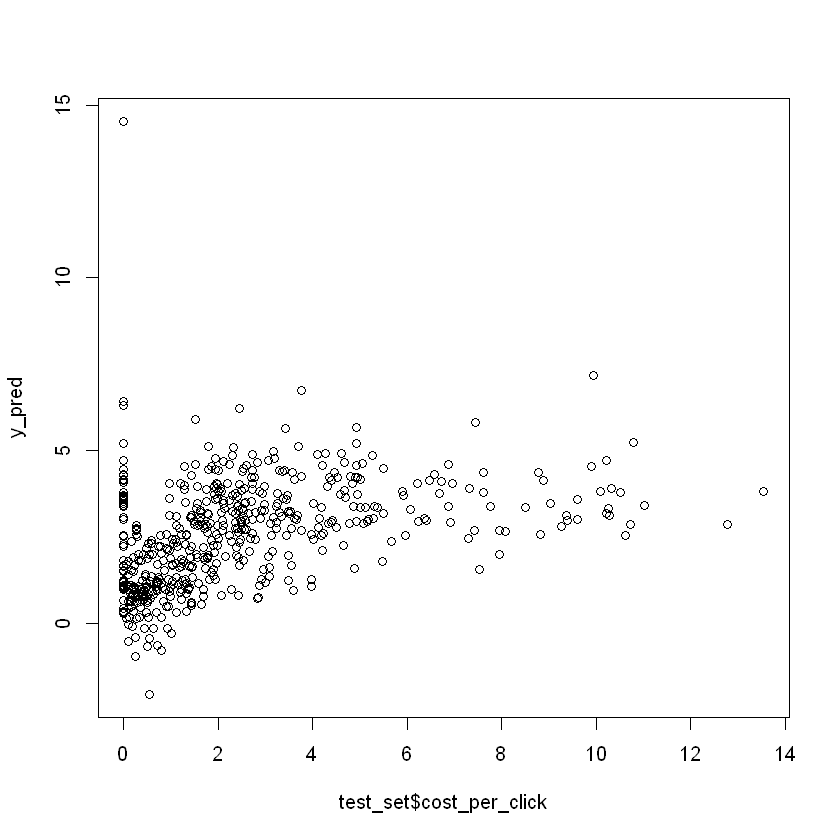

In [21]:
plot(test_set$cost_per_click,y_pred)

In [22]:
cor(test_set$cost_per_click,y_pred)

[1] 0.4293668

Some of the predicted cost per click is negative. So, we went for Deep Neural Network model in which "RELU" activation function takes care of this case